In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas import DataFrame,Series
%matplotlib inline

from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['FangSong'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

In [2]:
states={'SeriousDlqin2yrs':'好坏客户',
        'RevolvingUtilizationOfUnsecuredLines':'可用额度比值',
        'age':'年龄',
        'NumberOfTime30-59DaysPastDueNotWorse':'逾期30-59天笔数',
        'DebtRatio':'负债率',
        'MonthlyIncome':'月收入',
        'NumberOfOpenCreditLinesAndLoans':'信贷数量',
        'NumberOfTimes90DaysLate':'逾期90天笔数',
        'NumberRealEstateLoansOrLines':'固定资产贷款量',
        'NumberOfTime60-89DaysPastDueNotWorse':'逾期60-89天笔数',
        'NumberOfDependents':'家属数量'}

In [3]:
data = pd.read_csv('./datasets/rankingcard.csv',index_col=0)
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [4]:
data.rename(columns=states,inplace=True) #修改列索引为中文

In [5]:
data.head()#好坏客户为标签

,好坏客户,可用额度比值,年龄,逾期30-59天笔数,负债率,月收入,信贷数量,逾期90天笔数,固定资产贷款量,逾期60-89天笔数,家属数量
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [6]:
data.shape

(150000, 11)

- 去除重复的行数据
    - 现实数据，尤其是银行业数据，可能会存在的一个问题就是样本重复，即有超过一行的样本所显示的所有特征都一样。
    - 可以适当的恢复索引

In [7]:
data.duplicated().sum()

609

In [8]:
data.drop_duplicates(inplace=True)

In [6]:
data.index = range(data.shape[0]) #恢复行索引（恢复成连续的索引序号）

In [7]:
data.shape

(150000, 11)

- 缺失数据处理
- 可以适当的恢复索引

In [8]:
data.isnull().any(axis=0)

好坏客户          False
可用额度比值        False
年龄            False
逾期30-59天笔数    False
负债率           False
月收入            True
信贷数量          False
逾期90天笔数       False
固定资产贷款量       False
逾期60-89天笔数    False
家属数量           True
dtype: bool

In [9]:
data.isnull().sum(axis=0)

好坏客户              0
可用额度比值            0
年龄                0
逾期30-59天笔数        0
负债率               0
月收入           29731
信贷数量              0
逾期90天笔数           0
固定资产贷款量           0
逾期60-89天笔数        0
家属数量           3924
dtype: int64

- 家属人数列缺失数据比较少可以考虑直接删除，月收入缺失数据比较多，使用均值填充。
    - 新的填充方式：df.fillna({col:xxx})

In [10]:
data = data.loc[data['家属数量'].notnull()]

In [11]:
#对月收入的缺失值使用均值填充
data.fillna({'月收入':data['月收入'].mean()},inplace=True)

In [16]:
data.index = range(data.shape[0])

In [17]:
data.isnull().sum()

好坏客户          0
可用额度比值        0
年龄            0
逾期30-59天笔数    0
负债率           0
月收入           0
信贷数量          0
逾期90天笔数       0
固定资产贷款量       0
逾期60-89天笔数    0
家属数量          0
dtype: int64

- 异常数据处理
    - 但在银行数据中，我们希望排除的“异常值”不是一些超高或超低的数字，而是 一些不符合常理的数据:比如，收入不能为负数，但是一个超高水平的收入却是合理的，可以存在的。所以在银行 业中，我们往往就使用普通的描述性统计来观察数据的异常与否与数据的分布情况。注意，这种方法只能在特征量 有限的情况下进行，如果有几百个特征又无法成功降维或特征选择不管用

In [19]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
好坏客户,145563.0,0.067538,0.250952,0.0,0.000000,0.000000,0.000000,1.0
可用额度比值,145563.0,5.941378,250.510835,0.0,0.031218,0.158817,0.561085,50708.0
年龄,145563.0,52.110701,14.567652,0.0,41.000000,52.000000,62.000000,107.0
逾期30-59天笔数,145563.0,0.389185,3.756944,0.0,0.000000,0.000000,0.000000,98.0
负债率,145563.0,334.548251,1947.228209,0.0,0.173934,0.359090,0.770641,329664.0
月收入,145563.0,6675.098269,13074.358896,0.0,3816.000000,6400.000000,7500.000000,3008750.0
信贷数量,145563.0,8.553788,5.141132,0.0,5.000000,8.000000,11.000000,58.0
逾期90天笔数,145563.0,0.231309,3.728803,0.0,0.000000,0.000000,0.000000,98.0
固定资产贷款量,145563.0,1.033346,1.133115,0.0,0.000000,1.000000,2.000000,54.0
逾期60-89天笔数,145563.0,0.205622,3.712455,0.0,0.000000,0.000000,0.000000,98.0


In [20]:
data.describe([0.1,0.25,0.5,0.75,0.9,0.99]).T

,count,mean,std,min,10%,25%,50%,75%,90%,99%,max
好坏客户,145563.0,0.067538,0.250952,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
可用额度比值,145563.0,5.941378,250.510835,0.0,0.003455,0.031218,0.158817,0.561085,0.976557,1.093822,50708.0
年龄,145563.0,52.110701,14.567652,0.0,33.000000,41.000000,52.000000,62.000000,72.000000,86.000000,107.0
逾期30-59天笔数,145563.0,0.389185,3.756944,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,98.0
负债率,145563.0,334.548251,1947.228209,0.0,0.034398,0.173934,0.359090,0.770641,1150.000000,4934.380000,329664.0
月收入,145563.0,6675.098269,13074.358896,0.0,2300.000000,3816.000000,6400.000000,7500.000000,10833.000000,23334.380000,3008750.0
信贷数量,145563.0,8.553788,5.141132,0.0,3.000000,5.000000,8.000000,11.000000,15.000000,25.000000,58.0
逾期90天笔数,145563.0,0.231309,3.728803,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,98.0
固定资产贷款量,145563.0,1.033346,1.133115,0.0,0.000000,0.000000,1.000000,2.000000,2.000000,5.000000,54.0
逾期60-89天笔数,145563.0,0.205622,3.712455,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,98.0


- 年龄的最小值居然有0，这不符合银行的业务需求，即便是儿童账户也要至少8岁，我们可以 查看一下年龄为0的人有多少

In [21]:
(data['年龄'] == 0).sum()

1

- 发现只有一个人年龄为0，可以判断这肯定是录入失误造成的，可以当成是缺失值来处理，直接删除掉这个样本
- 可以适当的恢复索引


In [22]:
data = data.loc[data['年龄'] != 0]

- 另外，有三个指标看起来很奇怪:逾期30-59天笔数,逾期60-89天笔数,逾期90天笔数(这三个特征指的是两年内逾期次数),这三个特征最大值为98，看起来非常奇怪。一个人在过去两年内逾期35~59天98次，一年6个60天，两年内逾期98次这是怎么算出来的？将其删除
- 可以适当的恢复索引

In [23]:
data = data.loc[data['逾期30-59天笔数'] < 90]
data = data.loc[data['逾期60-89天笔数'] < 90]
data = data.loc[data['逾期90天笔数'] < 90]

In [24]:
data.index = range(data.shape[0])

In [25]:
data.describe([0.1,0.25,0.5,0.75,0.9,0.99]).T

,count,mean,std,min,10%,25%,50%,75%,90%,99%,max
好坏客户,145354.0,0.066775,0.249633,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.0
可用额度比值,145354.0,5.948483,250.690803,0.0,0.003445,0.031126,0.158095,0.558272,0.97396,1.093944,50708.0
年龄,145354.0,52.133233,14.557148,21.0,33.000000,41.000000,52.000000,62.000000,72.00000,86.000000,107.0
逾期30-59天笔数,145354.0,0.249570,0.703097,0.0,0.000000,0.000000,0.000000,0.000000,1.00000,3.000000,13.0
负债率,145354.0,335.020926,1948.587506,0.0,0.035759,0.174686,0.359533,0.771582,1155.00000,4936.000000,329664.0
月收入,145354.0,6679.158070,13082.838330,0.0,2300.000000,3825.250000,6400.000000,7500.000000,10838.00000,23342.050000,3008750.0
信贷数量,145354.0,8.566032,5.134644,0.0,3.000000,5.000000,8.000000,11.000000,15.00000,25.000000,58.0
逾期90天笔数,145354.0,0.091473,0.489090,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,2.000000,17.0
固定资产贷款量,145354.0,1.034818,1.133251,0.0,0.000000,0.000000,1.000000,2.000000,2.00000,5.000000,54.0
逾期60-89天笔数,145354.0,0.065750,0.331951,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,2.000000,11.0


- 查看标签的分布情况（是否存在样本类别分布不均衡现象）

In [26]:
data['好坏客户'].value_counts() / data['好坏客户'].value_counts().sum()

0    0.933225
1    0.066775
Name: 好坏客户, dtype: float64

### 特征选择
- 单变量分析
- IV&WOE编码

- 单变量分析
    - 是分析每一个自变量和因变量之间的联系，此处以年龄和好坏客户为例进行分析。

In [29]:
#对年龄进行分箱操作，分成5组，求解每一组中好坏客户的总量
age_cut = pd.cut(data['年龄'],bins=5).sort_index()
sum_cut = age_cut.value_counts()
sum_cut

(38.2, 55.4]      58019
(55.4, 72.6]      46139
(20.914, 38.2]    28020
(72.6, 89.8]      12623
(89.8, 107.0]       553
Name: 年龄, dtype: int64

In [31]:
#求各组的好坏客户数
bad_cut = pd.crosstab(age_cut,data['好坏客户'])[1]
good_cut =  pd.crosstab(age_cut,data['好坏客户'])[0]

In [33]:
#求各组坏客户的占比
bad_p = bad_cut / sum_cut
bad_p

(20.914, 38.2]    0.105175
(38.2, 55.4]      0.079526
(55.4, 72.6]      0.040053
(72.6, 89.8]      0.022578
(89.8, 107.0]     0.021700
dtype: float64

In [34]:
age_cut_group = pd.concat((bad_cut,good_cut,bad_p),axis=1)
age_cut_group.columns = ['坏客户数量','好客户数量','坏客户占比']
age_cut_group

,坏客户数量,好客户数量,坏客户占比
"(20.914, 38.2]",2947,25073,0.105175
"(38.2, 55.4]",4614,53405,0.079526
"(55.4, 72.6]",1848,44291,0.040053
"(72.6, 89.8]",285,12338,0.022578
"(89.8, 107.0]",12,541,0.021700


Text(0, 0.5, '客户数量')

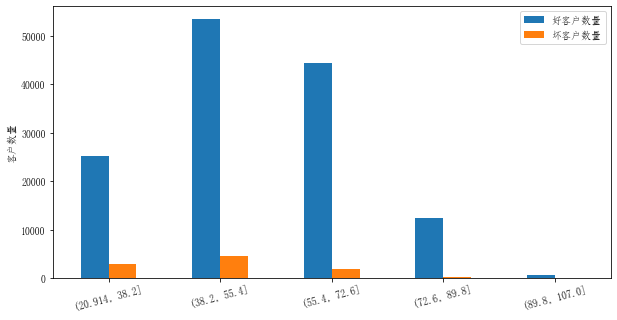

In [35]:
#使用柱状图表示不同年龄段好坏客户的数量
ax1 = age_cut_group[['好客户数量','坏客户数量']].plot.bar(figsize=(10,5))
ax1.set_xticklabels(age_cut_group.index,rotation=15)
ax1.set_ylabel('客户数量')

- 线形图展示坏客户率随年龄的变化趋势

Text(0.5, 1.0, '坏客户率随年龄的变化趋势图')

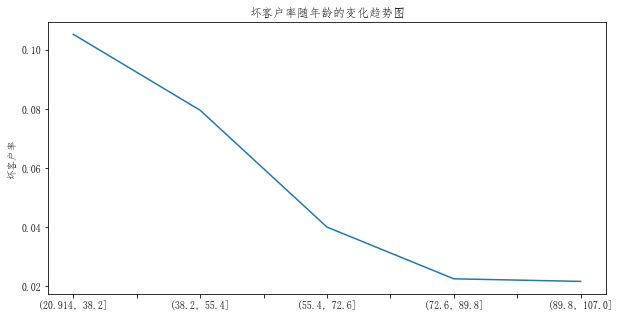

In [37]:
ax11=age_cut_group["坏客户占比"].plot(figsize=(10,5))
# ax11.set_xticklabels([0,20,29,38,47,55,64,72,81,89,98,107])
ax11.set_ylabel("坏客户率")
ax11.set_title("坏客户率随年龄的变化趋势图")

- 可以看出随着年龄的增长，坏客户率在降低，其中38~55之间变化幅度最大，说明年龄特征对好坏客户的判定影响还是比较大的

- 使用IV值进行特征选择
    

In [39]:
#分箱操作
cut1=pd.qcut(data["可用额度比值"],4)
cut2=pd.cut(data["年龄"],8)
bins3=[-1,0,1,3,5,13]
cut3=pd.cut(data["逾期30-59天笔数"],bins3)
cut4=pd.qcut(data["负债率"],3)
cut5=pd.qcut(data["月收入"],4)
cut6=pd.cut(data["信贷数量"],4)
bins7=[-1, 0, 1, 3,5, 20]
cut7=pd.cut(data["逾期90天笔数"],bins7)
bins8=[-1, 0,1,2, 3, 33]
cut8=pd.cut(data["固定资产贷款量"],bins8)
bins9=[-1, 0, 1, 3, 12]
cut9=pd.cut(data["逾期60-89天笔数"],bins9)
bins10=[-1, 0, 1, 2, 3, 5, 21]
cut10=pd.cut(data["家属数量"],bins10)

In [40]:
data['好坏客户'].value_counts()

0    135648
1      9706
Name: 好坏客户, dtype: int64

In [41]:
#get_iv_data封装
def get_iv_data(cut):
    gb = data['好坏客户'].value_counts() #整个样本中好坏客户样本数量
    gi = pd.crosstab(cut,data['好坏客户']) #每组中正反例样本数量
    gbi = (gi[1] / gi[0]) / (gb[1] / gb[0])
    woe = np.log(gbi)
    #iv = (py-pn)*woe中的py一组中正例样本和整个样本集中正例样本的比例
    iv = ((gi[1] / gb[1])-(gi[0]/gb[0]))*woe
    return iv

- 分箱的个数不同会导致特征IV值的不同，因此可以使用学习曲线找寻特征最优分箱数
    - 以年龄特征为例，分箱个数范围5-15为例测试

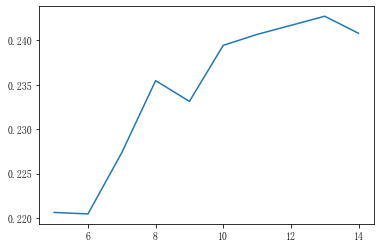

In [43]:
ivs = []
bins = []
for i in range(5,15):
    cut = pd.cut(data['年龄'],bins=i)
    iv_value = get_iv_data(cut).sum()
    ivs.append(iv_value)
    bins.append(i)
plt.plot(bins,ivs)

- 求出每一列特征的IV值

In [44]:
cut1_iv = get_iv_data(cut1).sum()
cut2_iv = get_iv_data(cut2).sum()
cut3_iv = get_iv_data(cut3).sum()
cut4_iv = get_iv_data(cut4).sum()
cut5_iv = get_iv_data(cut5).sum()
cut6_iv = get_iv_data(cut6).sum()
cut7_iv = get_iv_data(cut7).sum()
cut8_iv = get_iv_data(cut8).sum()
cut9_iv = get_iv_data(cut9).sum()
cut10_iv = get_iv_data(cut10).sum()

Text(0, 0.5, 'IV')

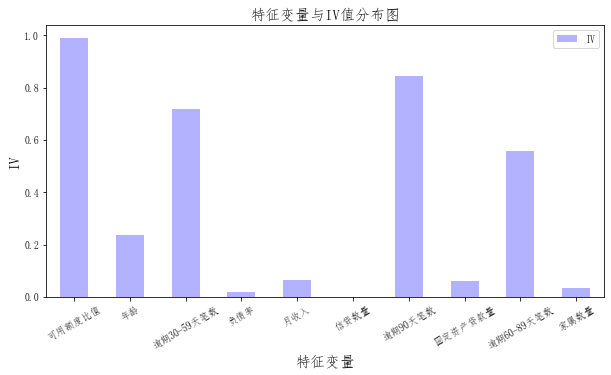

In [45]:
IV=pd.DataFrame([cut1_iv,cut2_iv,cut3_iv,cut4_iv,cut5_iv,cut6_iv,cut7_iv,cut8_iv,cut9_iv,cut10_iv],index=['可用额度比值','年龄','逾期30-59天笔数','负债率','月收入','信贷数量','逾期90天笔数','固定资产贷款量','逾期60-89天笔数','家属数量'],columns=['IV'])
iv=IV.plot.bar(color='b',alpha=0.3,rot=30,figsize=(10,5),fontsize=(10))
iv.set_title('特征变量与IV值分布图',fontsize=(15))
iv.set_xlabel('特征变量',fontsize=(15))
iv.set_ylabel('IV',fontsize=(15))

In [46]:
IV['IV'].sort_values(ascending=False)

可用额度比值        0.989174
逾期90天笔数       0.842678
逾期30-59天笔数    0.718925
逾期60-89天笔数    0.558689
年龄            0.235474
月收入           0.066258
固定资产贷款量       0.059868
家属数量          0.034721
负债率           0.019231
信贷数量          0.000821
Name: IV, dtype: float64